In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
print("All packages have been installed successfully!")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


All packages have been installed successfully!


In [2]:
df = pd.read_csv('/kaggle/input/bangladesh-economic-indicator/BD_economic_indicators.csv')
df.head()

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.10%,15.40%,NaN,NaN,14.44%
1,1981,47.4,560,5.60%,14.50%,NaN,NaN,17.16%
2,1982,52.0,597,3.20%,12.90%,NaN,NaN,17.36%
3,1983,56.5,633,4.60%,9.50%,NaN,NaN,16.56%
4,1984,61.0,664,4.20%,10.40%,NaN,NaN,16.48%


In [3]:
df.tail()

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
35,2015,581.6,"3,638",6.80%,6.20%,4.42%,33.60%,28.89%
36,2016,629.9,"3,900",7.20%,5.70%,4.35%,33.30%,29.65%
37,2017,690.5,"4,231",7.60%,5.60%,4.37%,32.60%,30.51%
38,2018,753.4,"4,630",7.90%,5.60%,4.30%,34.00%,31.23%
39,2019,817.6,"5,028",8.10%,5.50%,4.29%,33.50%,31.60%


In [4]:
r,c = df.shape
print("The number of columns in the dataset = ",c)
print("The number of rows in the dataset    = ",r)

The number of columns in the dataset =  8
The number of rows in the dataset    =  40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              40 non-null     int64  
 1   GDP               40 non-null     float64
 2   GDP per capita    40 non-null     object 
 3   GDP growth        40 non-null     object 
 4   Inflation rate    40 non-null     object 
 5   Unemployed rate   29 non-null     object 
 6   Government debt   17 non-null     object 
 7   Total Investment  40 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.6+ KB


In [6]:
df = df.replace(np.nan,'%')

In [7]:
df.head(15)

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.10%,15.40%,%,%,14.44%
1,1981,47.4,560,5.60%,14.50%,%,%,17.16%
2,1982,52.0,597,3.20%,12.90%,%,%,17.36%
3,1983,56.5,633,4.60%,9.50%,%,%,16.56%
4,1984,61.0,664,4.20%,10.40%,%,%,16.48%
5,1985,65.3,693,3.70%,10.50%,%,%,15.83%
6,1986,69.3,715,4.00%,10.20%,%,%,16.18%
7,1987,73.1,735,2.90%,10.80%,%,%,15.47%
8,1988,77.5,759,2.40%,9.70%,%,%,15.74%
9,1989,84.0,801,4.30%,8.70%,%,%,16.12%


In [8]:
df['GDP growth'] = df['GDP growth'].map(lambda x: x.rstrip('%'))
df['Inflation rate'] = df['Inflation rate'].map(lambda x: x.rstrip('%'))
df['Total Investment'] = df['Total Investment'].map(lambda x: x.rstrip('%'))
df['Unemployed rate'] = df['Unemployed rate'].map(lambda x: x.rstrip('%'))
df['Government debt'] = df['Government debt'].map(lambda x: x.rstrip('%'))
df['GDP per capita'].replace(',','', regex=True, inplace=True)

In [9]:
df['GDP growth'] = pd.to_numeric(df['GDP growth'],errors='coerce')
df['Inflation rate'] = pd.to_numeric(df['Inflation rate'],errors='coerce')
df['Total Investment'] = pd.to_numeric(df['Total Investment'],errors='coerce')
df['Unemployed rate'] = pd.to_numeric(df['Unemployed rate'],errors='coerce')
df['Government debt'] = pd.to_numeric(df['Government debt'],errors='coerce')
df['GDP per capita'] = pd.to_numeric(df['GDP per capita'],errors='coerce')

In [10]:
m = df['Unemployed rate'].mean()
m1 = df['Government debt'].mean()

In [11]:
df['Unemployed rate'] = df['Unemployed rate'].replace(np.nan,m)
df['Government debt'] = df['Government debt'].replace(np.nan,m1)

In [12]:
df

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.1,15.4,3.608276,37.694118,14.44
1,1981,47.4,560,5.6,14.5,3.608276,37.694118,17.16
2,1982,52.0,597,3.2,12.9,3.608276,37.694118,17.36
3,1983,56.5,633,4.6,9.5,3.608276,37.694118,16.56
4,1984,61.0,664,4.2,10.4,3.608276,37.694118,16.48
5,1985,65.3,693,3.7,10.5,3.608276,37.694118,15.83
6,1986,69.3,715,4.0,10.2,3.608276,37.694118,16.18
7,1987,73.1,735,2.9,10.8,3.608276,37.694118,15.47
8,1988,77.5,759,2.4,9.7,3.608276,37.694118,15.74
9,1989,84.0,801,4.3,8.7,3.608276,37.694118,16.12


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              40 non-null     int64  
 1   GDP               40 non-null     float64
 2   GDP per capita    40 non-null     int64  
 3   GDP growth        40 non-null     float64
 4   Inflation rate    40 non-null     float64
 5   Unemployed rate   40 non-null     float64
 6   Government debt   40 non-null     float64
 7   Total Investment  40 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 2.6 KB


In [14]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Year,40.0,1999.500000,11.690452,1980.00,1989.750000,1999.500000,2009.250000,2019.0
GDP,40.0,257.557500,215.532485,41.20,89.325000,173.550000,371.675000,817.6
GDP per capita,40.0,1799.400000,1236.066939,500.00,836.250000,1322.500000,2478.750000,5028.0
GDP growth,40.0,5.305000,1.350964,2.40,4.450000,5.300000,6.300000,8.1
Inflation rate,40.0,7.577500,3.205723,1.90,5.575000,7.000000,9.800000,15.4
Unemployed rate,40.0,3.608276,0.698567,2.20,3.345000,3.608276,4.260000,5.0
Government debt,40.0,37.694118,2.581936,32.60,37.420588,37.694118,37.694118,44.3
Total Investment,40.0,22.455000,5.314517,14.44,17.095000,23.265000,26.220000,31.6


Text(0.5, 1.0, 'Correlation of Parameters\n')

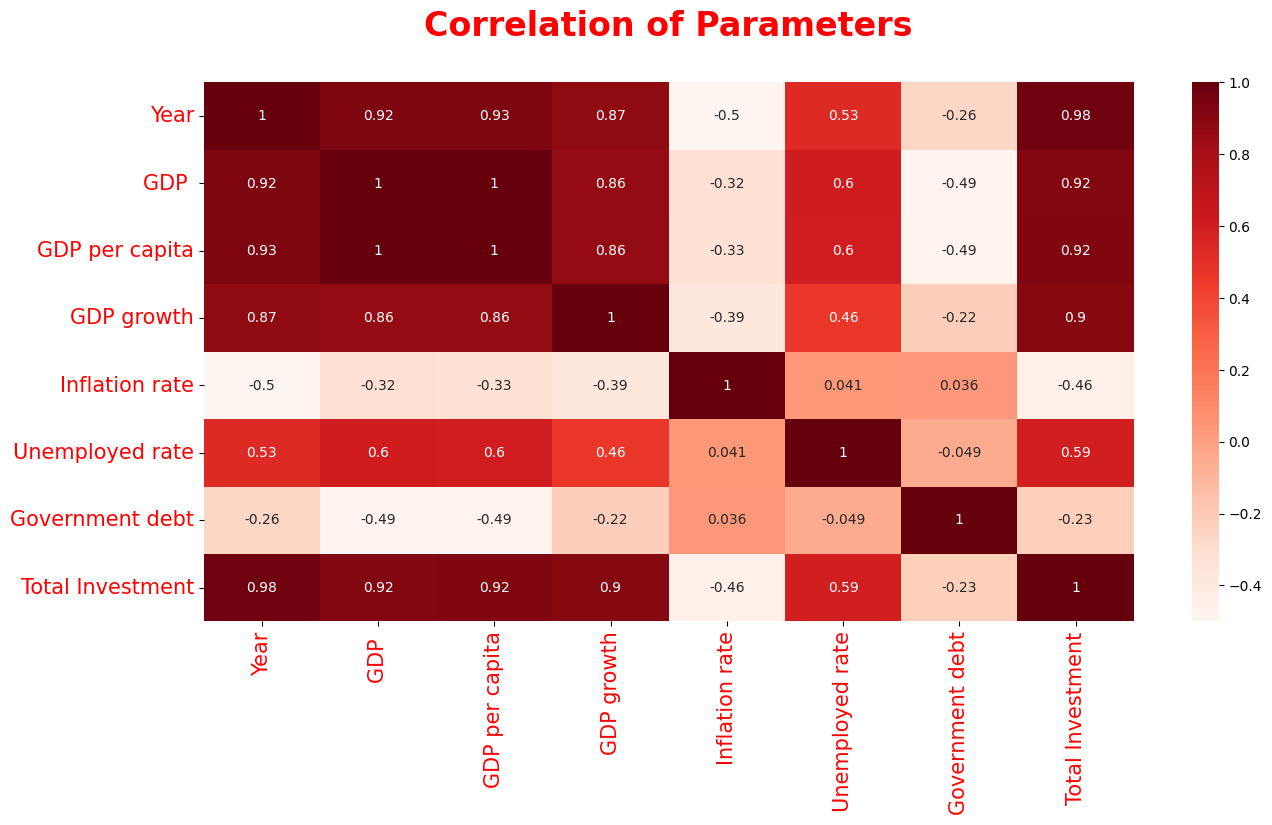

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.xticks(fontsize=15,color='red')
plt.yticks(fontsize=15,color='red')
plt.title("Correlation of Parameters\n",fontsize=24,fontweight='bold',color='red')

In [16]:
df1 = df.set_index('Year')

Text(0.5, 1.0, 'GDP rise with years\n')

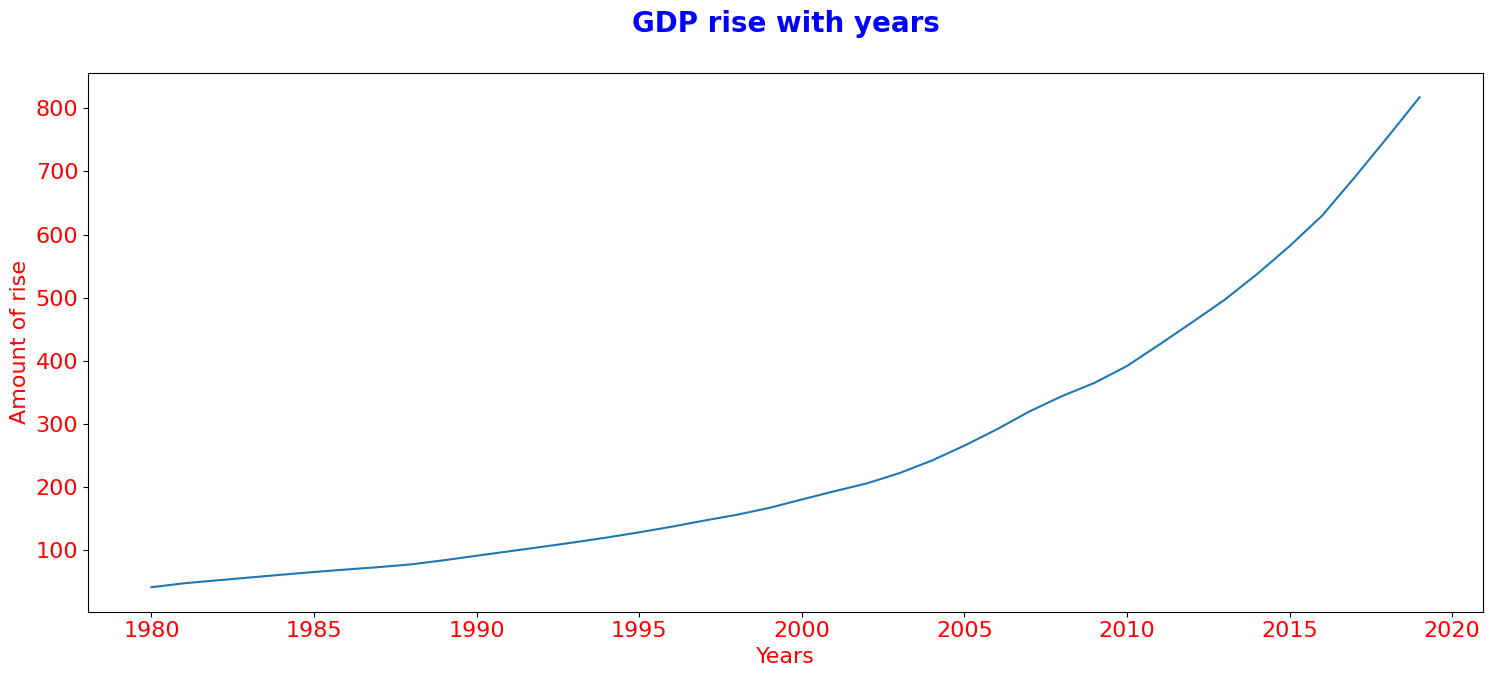

In [17]:
plt.figure(figsize=(18,7))
df1['GDP '].plot()
plt.xticks(fontsize=16,color='red')
plt.xlabel('Years',fontsize=16,color='red')
plt.ylabel('Amount of rise',fontsize=16,color='red')
plt.yticks(fontsize=16,color='red')
plt.title('GDP rise with years\n',fontsize=20,fontweight='bold',color='blue')

Text(0.5, 1.0, 'GDP per capita rise with years\n')

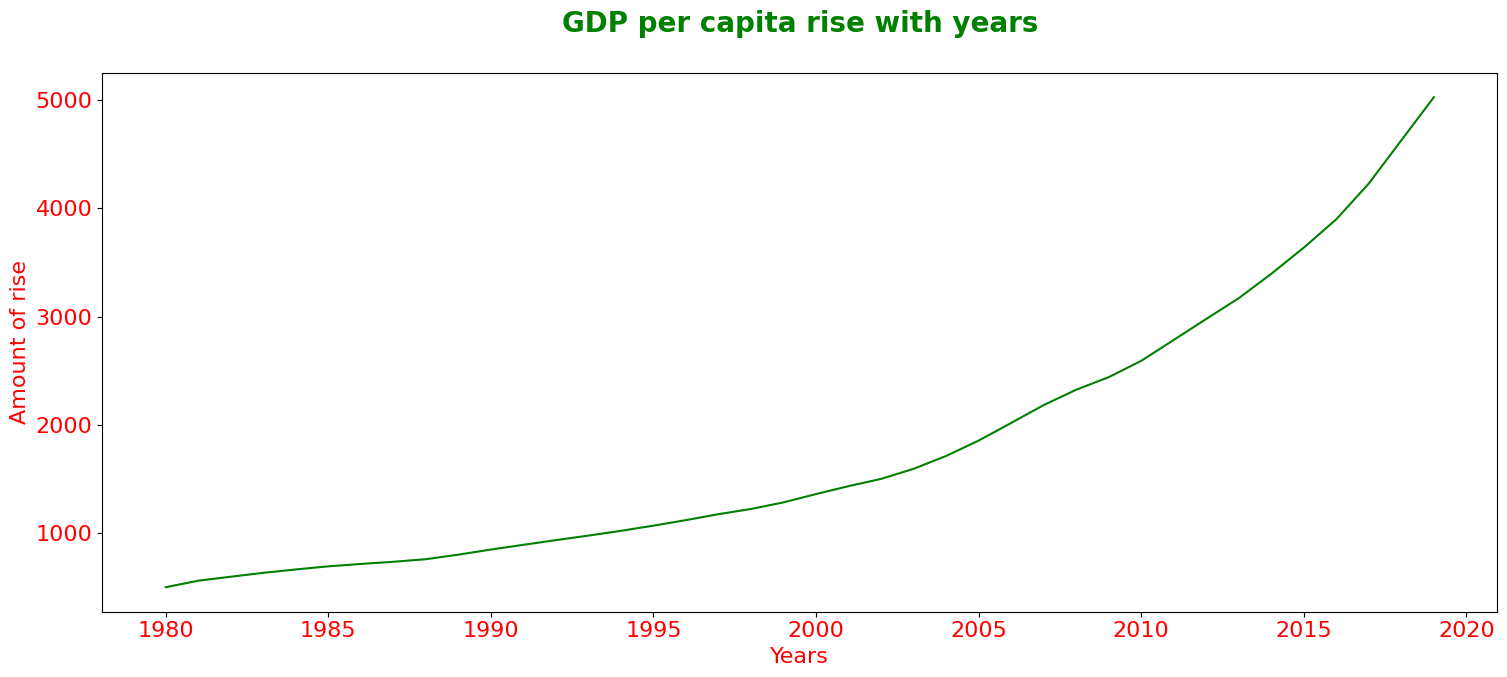

In [18]:
plt.figure(figsize=(18,7))
df1['GDP per capita'].plot(color='green')
plt.xticks(fontsize=16,color='red')
plt.xlabel('Years',fontsize=16,color='red')
plt.ylabel('Amount of rise',fontsize=16,color='red')
plt.yticks(fontsize=16,color='red')
plt.title('GDP per capita rise with years\n',fontsize=20,fontweight='bold',color='green')

In [19]:
# importing pmdarima package
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.9 MB/s eta 0:00:0000:01


In [20]:
!pip install folium==0.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79793 sha256=a09b52f2237db31f2e5c4790fa938019c95814bccdfe18baf584705f8f01e88c
  Stored in directory: /root/.cache/pip/wheels/00/0c/07/d7792a5444d5bb074361ac27da53cee9d5cce59a07fe9da5dd
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.15.1
    Uninstalling folium-0.15.1:
      Successfully uninstalled folium-0.15.1


In [21]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [22]:
train = df[:30].values.reshape(-1,1)
valid = df[31:].values.reshape(-1,1)

In [23]:
model = pm.auto_arima(train, seasonal=True, m=6)

<Figure size 1800x700 with 0 Axes>

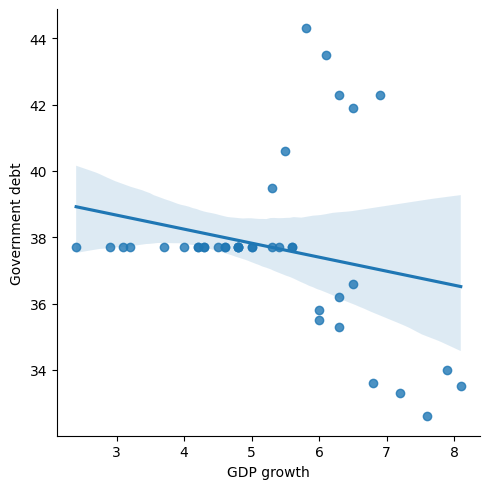

In [24]:
plt.figure(figsize=(18,7))
sns.lmplot(x='GDP growth',y='Government debt',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'GDP growth vs Total Investment\n')

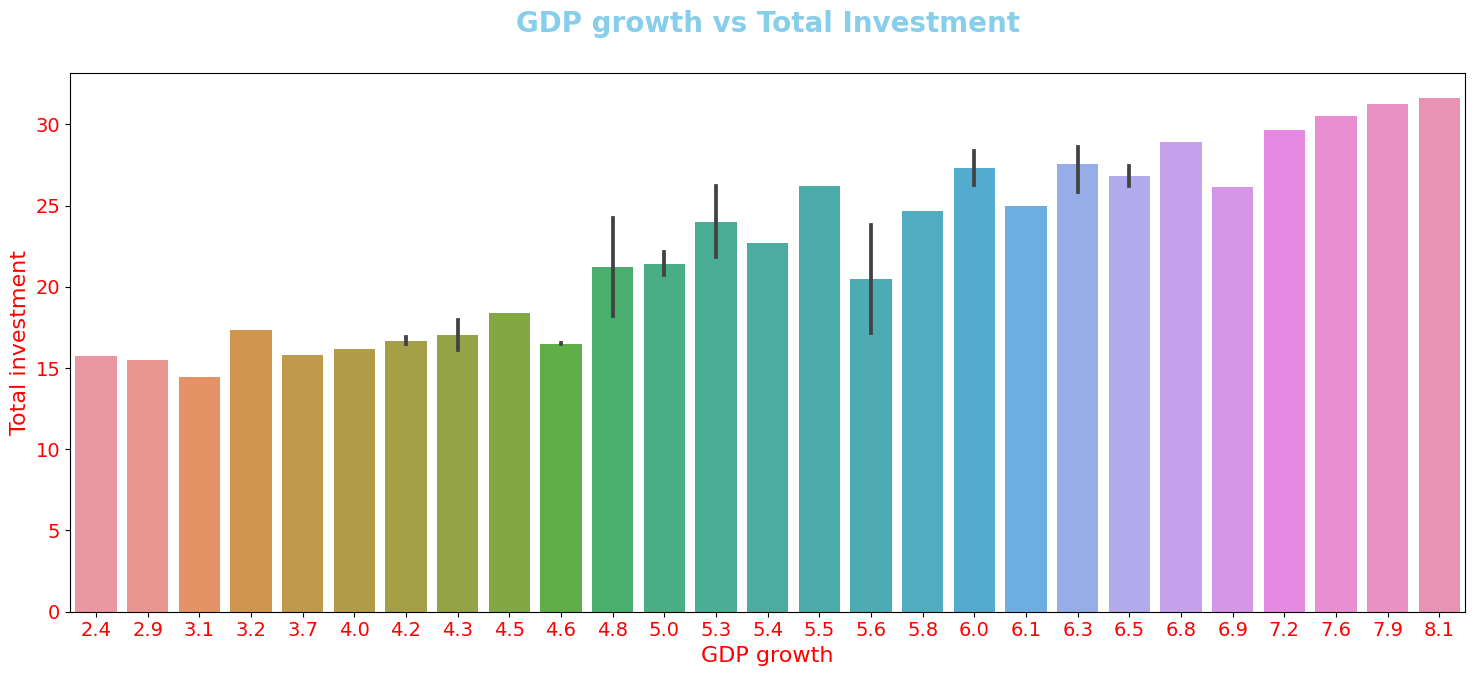

In [25]:
plt.figure(figsize=(18,7))
sns.barplot(x='GDP growth',y='Total Investment',data=df)
plt.xticks(fontsize=14,color='red')
plt.xlabel('GDP growth',fontsize=16,color='red')
plt.ylabel('Total investment',fontsize=16,color='red')
plt.yticks(fontsize=14,color='red')
plt.title('GDP growth vs Total Investment\n',fontsize=20,fontweight='bold',color='skyblue')

Text(0.5, 1.0, 'GDP effect on Inflation and Government debts\n')

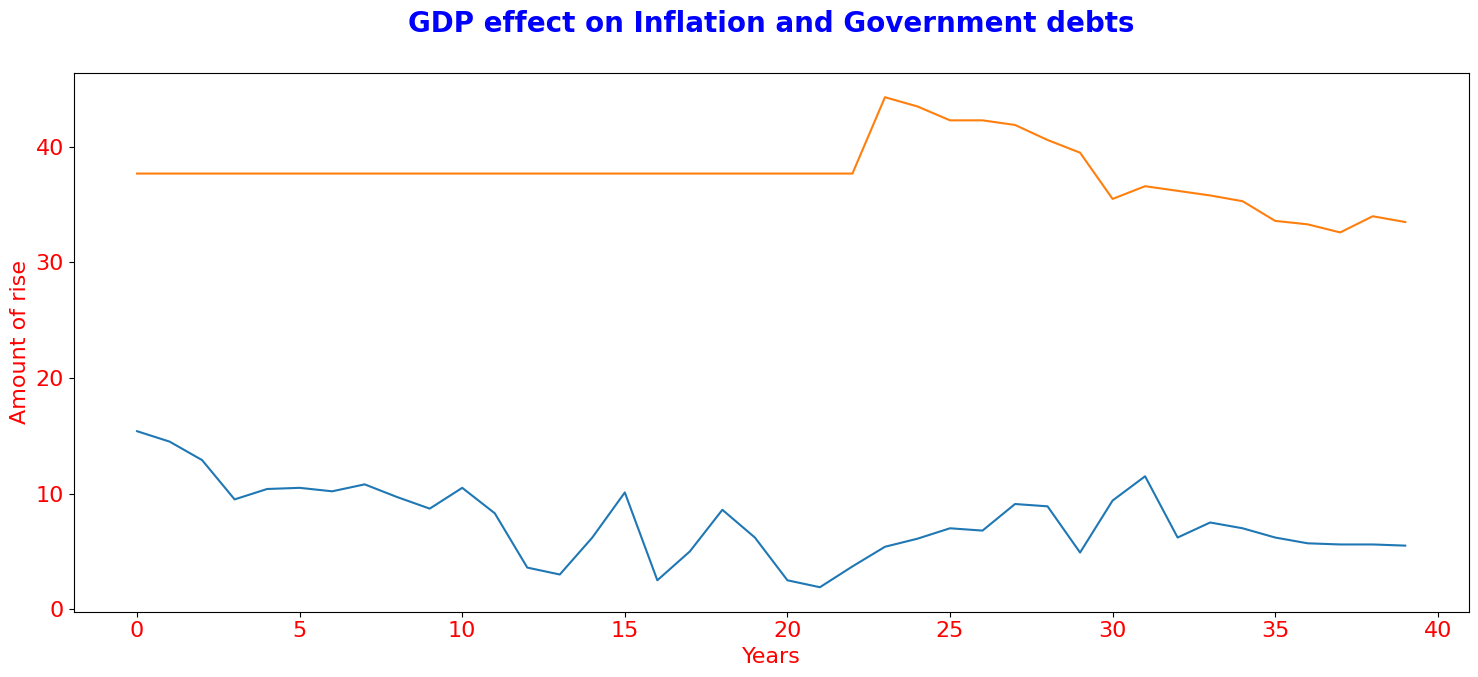

In [26]:
plt.figure(figsize=(18,7))
df['Inflation rate'].plot()
df['Government debt'].plot()
plt.xticks(fontsize=16,color='red')
plt.xlabel('Years',fontsize=16,color='red')
plt.ylabel('Amount of rise',fontsize=16,color='red')
plt.yticks(fontsize=16,color='red')
plt.title('GDP effect on Inflation and Government debts\n',fontsize=20,fontweight='bold',color='blue')

In [27]:
data = px.data.gapminder()
fig = px.bar(df, x='GDP growth', y= 'Unemployed rate', hover_data=['GDP growth', 'Unemployed rate'], color='GDP growth', height=500)
fig.update_layout(title_text= 'GDP growth v Unemployed rate')
fig.show()

In [28]:
fig = px.scatter_3d(df.tail(20), x='GDP growth',y= 'Unemployed rate' , z='Inflation rate', color='Year')
fig.update_layout(title='3D Scatter Plot of GDP growth, Unemployed rate & Inflation rate')
fig.show()